<a href="https://colab.research.google.com/github/eunhobang/ICT-AI-education/blob/main/8_10_%EC%BA%90%EA%B8%80%EC%BD%94%EB%93%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/siddheshpujari/eda-and-prediction-of-house-price/notebook

#### Import Libraries

In [2]:
# 라이브러리
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

#Showing full path of datasets
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

#### 데이터 가져오기

In [ ]:
#We'll be using the training dataset for our analysis.

df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

#### Dataset Info

In [ ]:
#First 5 rows of our dataset

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 데이터 shaple

In [ ]:
#Number of rows and columns
df.shape

(1460, 81)

#### 데이터 컬럼 확인

In [ ]:
#Columns in our dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### 데이터 설명

- df.describe()와 df.describe().T차이
  - 행과 열이 바뀜

In [ ]:
#Description of our dataset # describe: 설명하다
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 비대칭 정도 확인
- 0하고 가까우면 대칭


- Skewness tells us about the symmetry in a distribution.
- If Skewness is equal to zero , It is a symmetrical distribution.
- And If Skewness is less than or more than zero then - it is a non-symmetrical distribution.

If value is less than zero , distribution is left skewed and value is more than zero , distribution is right skewed.
In our above data,
LotArea
LowQualFinSF
SsnPorchPoolArea
MiscVal
Are highly positively,right skewed.

In [ ]:
#Let's look at the skewness of our dataset

df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

#### 컬럼 데이터 타입 확인

The above information tells us

- Our dataset features consists of three datatypes
float
integer
object
- Of which total numerical features are 38
- And categorical features are 43.
- But if we look closely , we see that some of the data types are incorrect.
- For ex :- MSSubClass,OverallQual and OverallCond should be object data types.
- Also we don't have complete data for all of our features

In [ ]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 데이터 컬럼 타입 변경

In [ ]:
#We'll be applying the same changes to df and test dataset.

features_to_change = ['MSSubClass','OverallQual','OverallCond','YearBuilt', 'YearRemodAdd',
                     'MoSold', 'YrSold','GarageCars']

int_to_object = ['MSSubClass','OverallQual','OverallCond','GarageCars']

for feature in int_to_object:
    df[feature] = df[feature].astype(object)
    test[feature] = test[feature].astype(object)

In [ ]:
#Drop Id column as it is not required
# Id 열 불필요하여 삭제

df.drop(columns=['Id'],axis=1,inplace=True) # axis=1 열
test.drop(columns=['Id'],axis=1,inplace=True)

#### Null Values

- 6965 is a big number that tells us there are a lot of missing values in train dataset
(6965는 기차 데이터 세트에 누락된 값이 많다는 것을 알려주는 큰 숫자입니다.)

- sum()과 sum().sum()차이
  - 각 column의 null값
  - 모든 column의 null값


In [ ]:
#let's see if our dataset contains missing values.
# trian null 값 확인
df.isna().sum().sum()

6965

In [ ]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
#Find out missing values in test dataset.
# test null 값 확인
test.isna().sum().sum()

7000

#### missing value 그래프

In [ ]:
#First we create a list of missing values by each feature
temp = list(df.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in df.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [ ]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values',title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
#The following columns have missing values(다음 열에는 누락된 값이 있습니다.)

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

#### Missing values in test dataset

In [ ]:
#We'll use the same code
#First we create a list of missing values by each feature
temp = list(test.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in test.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1456
1,MiscFeature,1408
2,Alley,1352
3,Fence,1169
4,FireplaceQu,730
5,LotFrontage,227
6,GarageCond,78
7,GarageYrBlt,78
8,GarageQual,78
9,GarageFinish,78


In [ ]:
temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1456
1,MiscFeature,1408
2,Alley,1352
3,Fence,1169
4,FireplaceQu,730
5,LotFrontage,227
6,GarageCond,78
7,GarageYrBlt,78
8,GarageQual,78
9,GarageFinish,78


- We have more features here with missing values.

Firstly , we'll deal with the numerical features in train 
dataset and do similar changes in test dataset.

- LotFrontage has 259 missing values.

- MasVnrArea has only 8 missing values

- GarageyrBlt has 81 missing values.

Let's start filling these null values

<해석>

LotFrontage에 259개의 결측값이 있습니다.

MasVnrArea에는 8개의 누락된 값만 있습니다.

GarageyrBlt에는 81개의 누락된 값이 있습니다.

이 null 값을 채우기 시작합시다. 

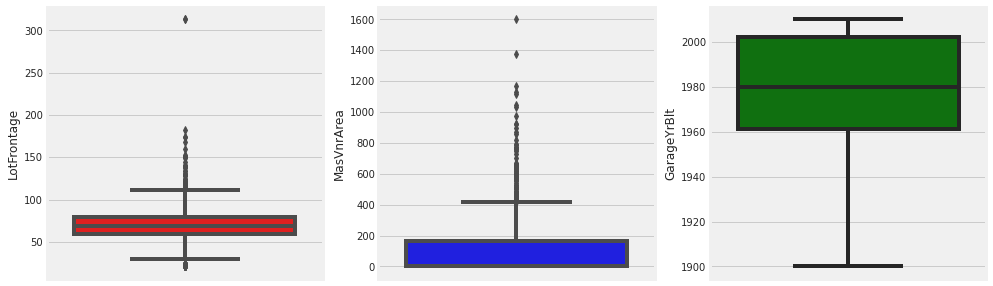

In [ ]:
#There's no need of dropping the na values as we have less missing values.
#If there are outliers in these three columns, we can fill them with their median values.
#if not then mean is fine.

# 결측값이 적기 때문에 na 값을 삭제할 필요가 없습니다.
#이 세 열에 이상치가 있으면 중앙값으로 채울 수 있습니다.
#그렇지 않다면 의미는 괜찮습니다.

plt.figure(figsize=(15,5))

features_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = df[features_to_examine]
colors=['','red','blue','green']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

In [ ]:
#There are outliers in Lotfrontage and MasVnrArea .
#Let's look at the mean and median values of all three columns

#Lotfrontage 및 MasVnrArea 에 이상치가 있습니다.
# 세 열 모두의 평균과 중앙값을 살펴보겠습니다.

df['LotFrontage'].mean(),df['LotFrontage'].median()

(70.04995836802665, 69.0)

In [ ]:
df['MasVnrArea'].mean(),df['MasVnrArea'].median()

(103.68526170798899, 0.0)

In [ ]:
df['GarageYrBlt'].mean(),df['GarageYrBlt'].median()

(1978.5061638868744, 1980.0)

Missing value를 중안 값으로 채움

In [ ]:
features_to_examine

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
#filling the missing values with median
for col in features_to_examine:
    df[col].fillna(df[col].median(),inplace=True)

In [ ]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

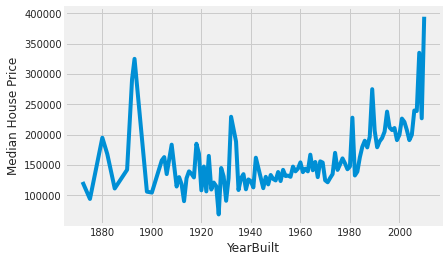

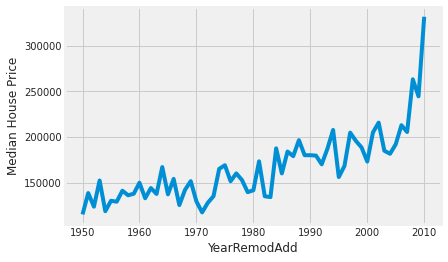

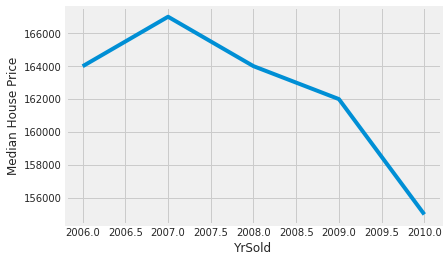

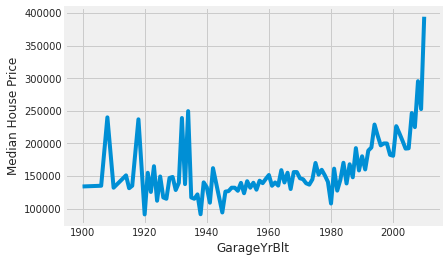

In [ ]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

for feature in year_features:
    ax = df.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

In [ ]:
data=df.copy()
data['Sold-Built'] = data['YrSold'] - data['YearBuilt']
fig=px.scatter(data,x="Sold-Built",y="SalePrice",width=700)
fig.show()

data=df.copy()
data['Sold-Remodelled'] = data['YrSold'] - data['YearRemodAdd']
fig=px.scatter(data,x="Sold-Remodelled",y="SalePrice",width=700)
fig.show()

data=df.copy()
data['Sold-GarageBuilt'] = data['YrSold'] - data['GarageYrBlt']
fig=px.scatter(data,x="Sold-GarageBuilt",y="SalePrice",width=700)
fig.show()
